In [2]:
import sys
sys.path.append('../')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import GermanCreditLoader
loader = GermanCreditLoader(data_dir='../data/raw/')

In [14]:
X_train, X_test, y_train, y_test, _, _ = loader.load_and_split()
df = X_train.copy()
df["target"] = y_train

print("Dataset shape:", df.shape)
display(df.head())

Loading existing raw data...
Categorical columns: ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
Numerical columns: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
Training set shape: (800, 20)
Test set shape: (200, 20)
Target distribution - Train: {1: 560, 0: 240}
Target distribution - Test: {1: 140, 0: 60}
Dataset shape: (800, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
675,3,30,1,6,4530,2,1,4,0,2,...,0,26,1,2,1,0,1,1,1,1
703,0,30,2,0,2503,0,3,4,3,2,...,1,41,2,1,2,1,1,0,1,1
12,0,12,3,6,1567,2,0,1,0,2,...,0,22,1,1,1,1,1,1,1,1
845,0,21,3,3,3976,4,1,2,3,2,...,0,35,1,1,1,1,1,1,1,1
795,3,9,3,3,2301,0,2,2,0,2,...,1,22,1,2,1,1,1,0,1,1


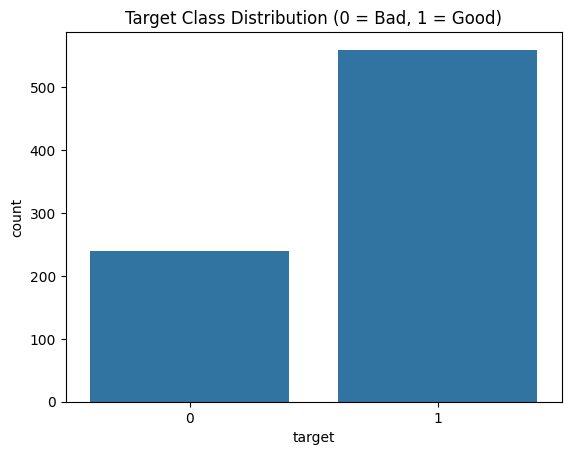

In [5]:
sns.countplot(x="target", data=df)
plt.title("Target Class Distribution (0 = Bad, 1 = Good)")
plt.show()

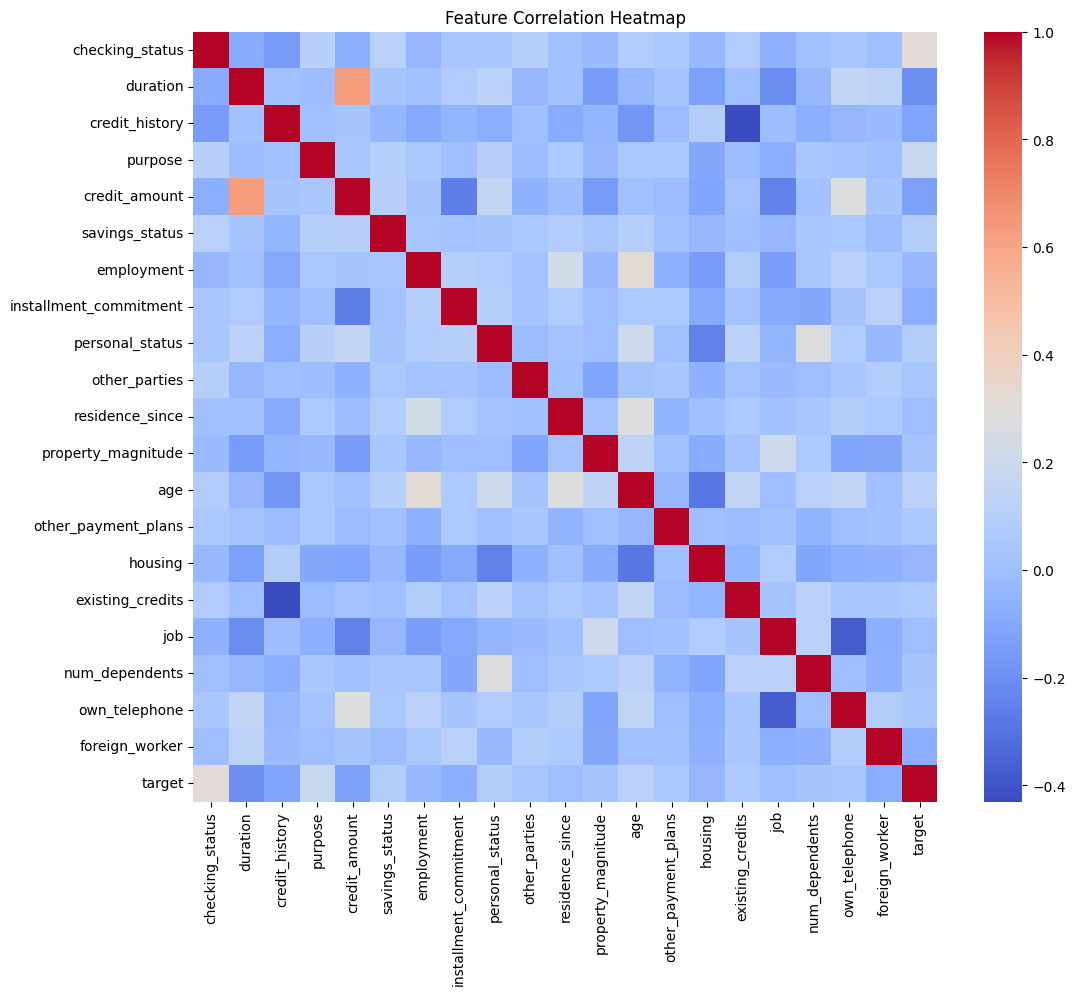

In [6]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
target_corr = corr["target"].drop("target").sort_values(ascending=False)
print("Top 10 positively correlated features:\n", target_corr.head(10))
print("\nTop 10 negatively correlated features:\n", target_corr.tail(10))

Top 10 positively correlated features:
 checking_status        0.308926
purpose                0.173601
age                    0.115076
savings_status         0.088750
personal_status        0.087109
existing_credits       0.059386
other_payment_plans    0.052809
own_telephone          0.046190
other_parties          0.036198
property_magnitude     0.032293
Name: target, dtype: float64

Top 10 negatively correlated features:
 num_dependents            0.031696
residence_since          -0.000246
job                      -0.001737
employment               -0.026155
housing                  -0.036143
installment_commitment   -0.074202
foreign_worker           -0.080149
credit_history           -0.119011
credit_amount            -0.138192
duration                 -0.204895
Name: target, dtype: float64


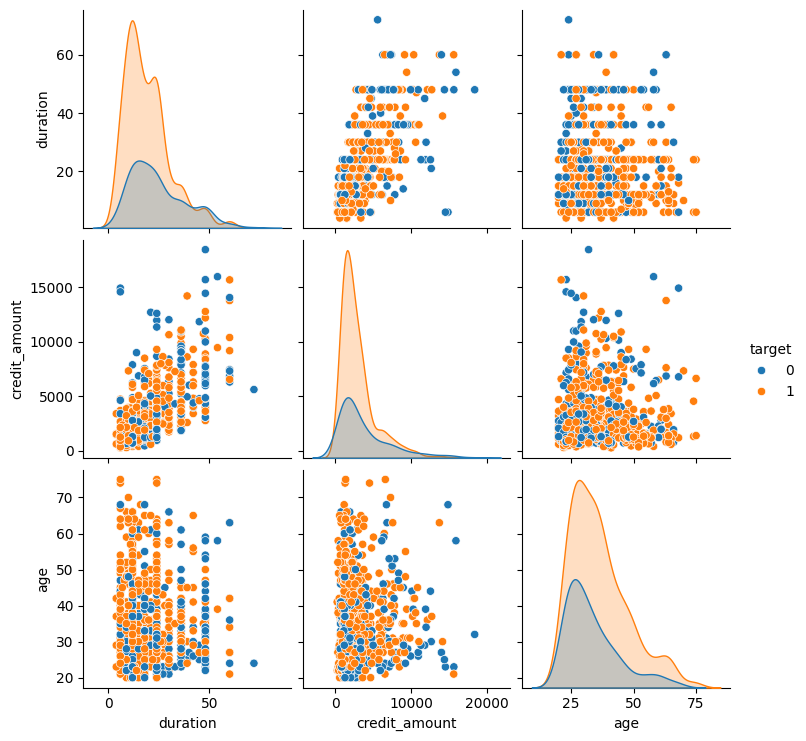

In [8]:
subset_cols = ["duration", "credit_amount", "age", "target"]
sns.pairplot(df[subset_cols], hue="target")
plt.show()

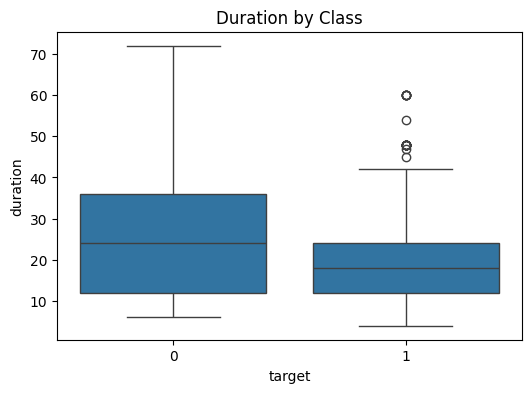

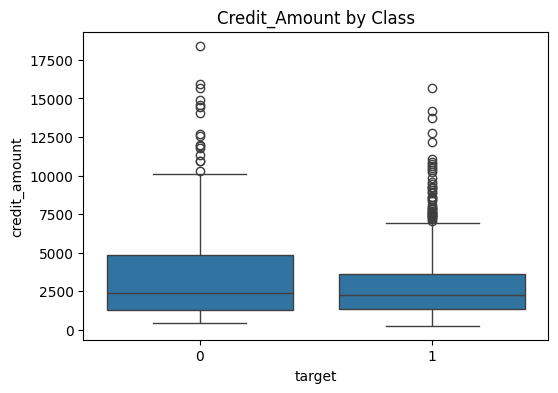

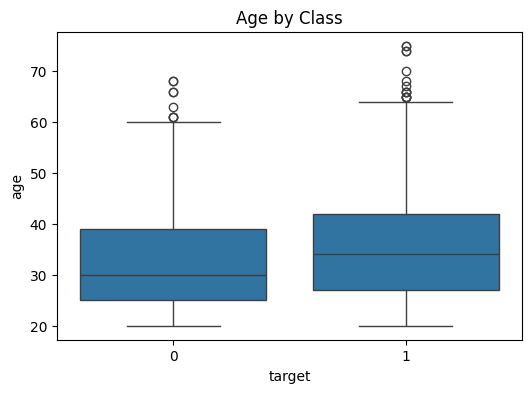

In [9]:
# Boxplots for numeric outliers
for col in ["duration", "credit_amount", "age"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col.title()} by Class")
    plt.show()

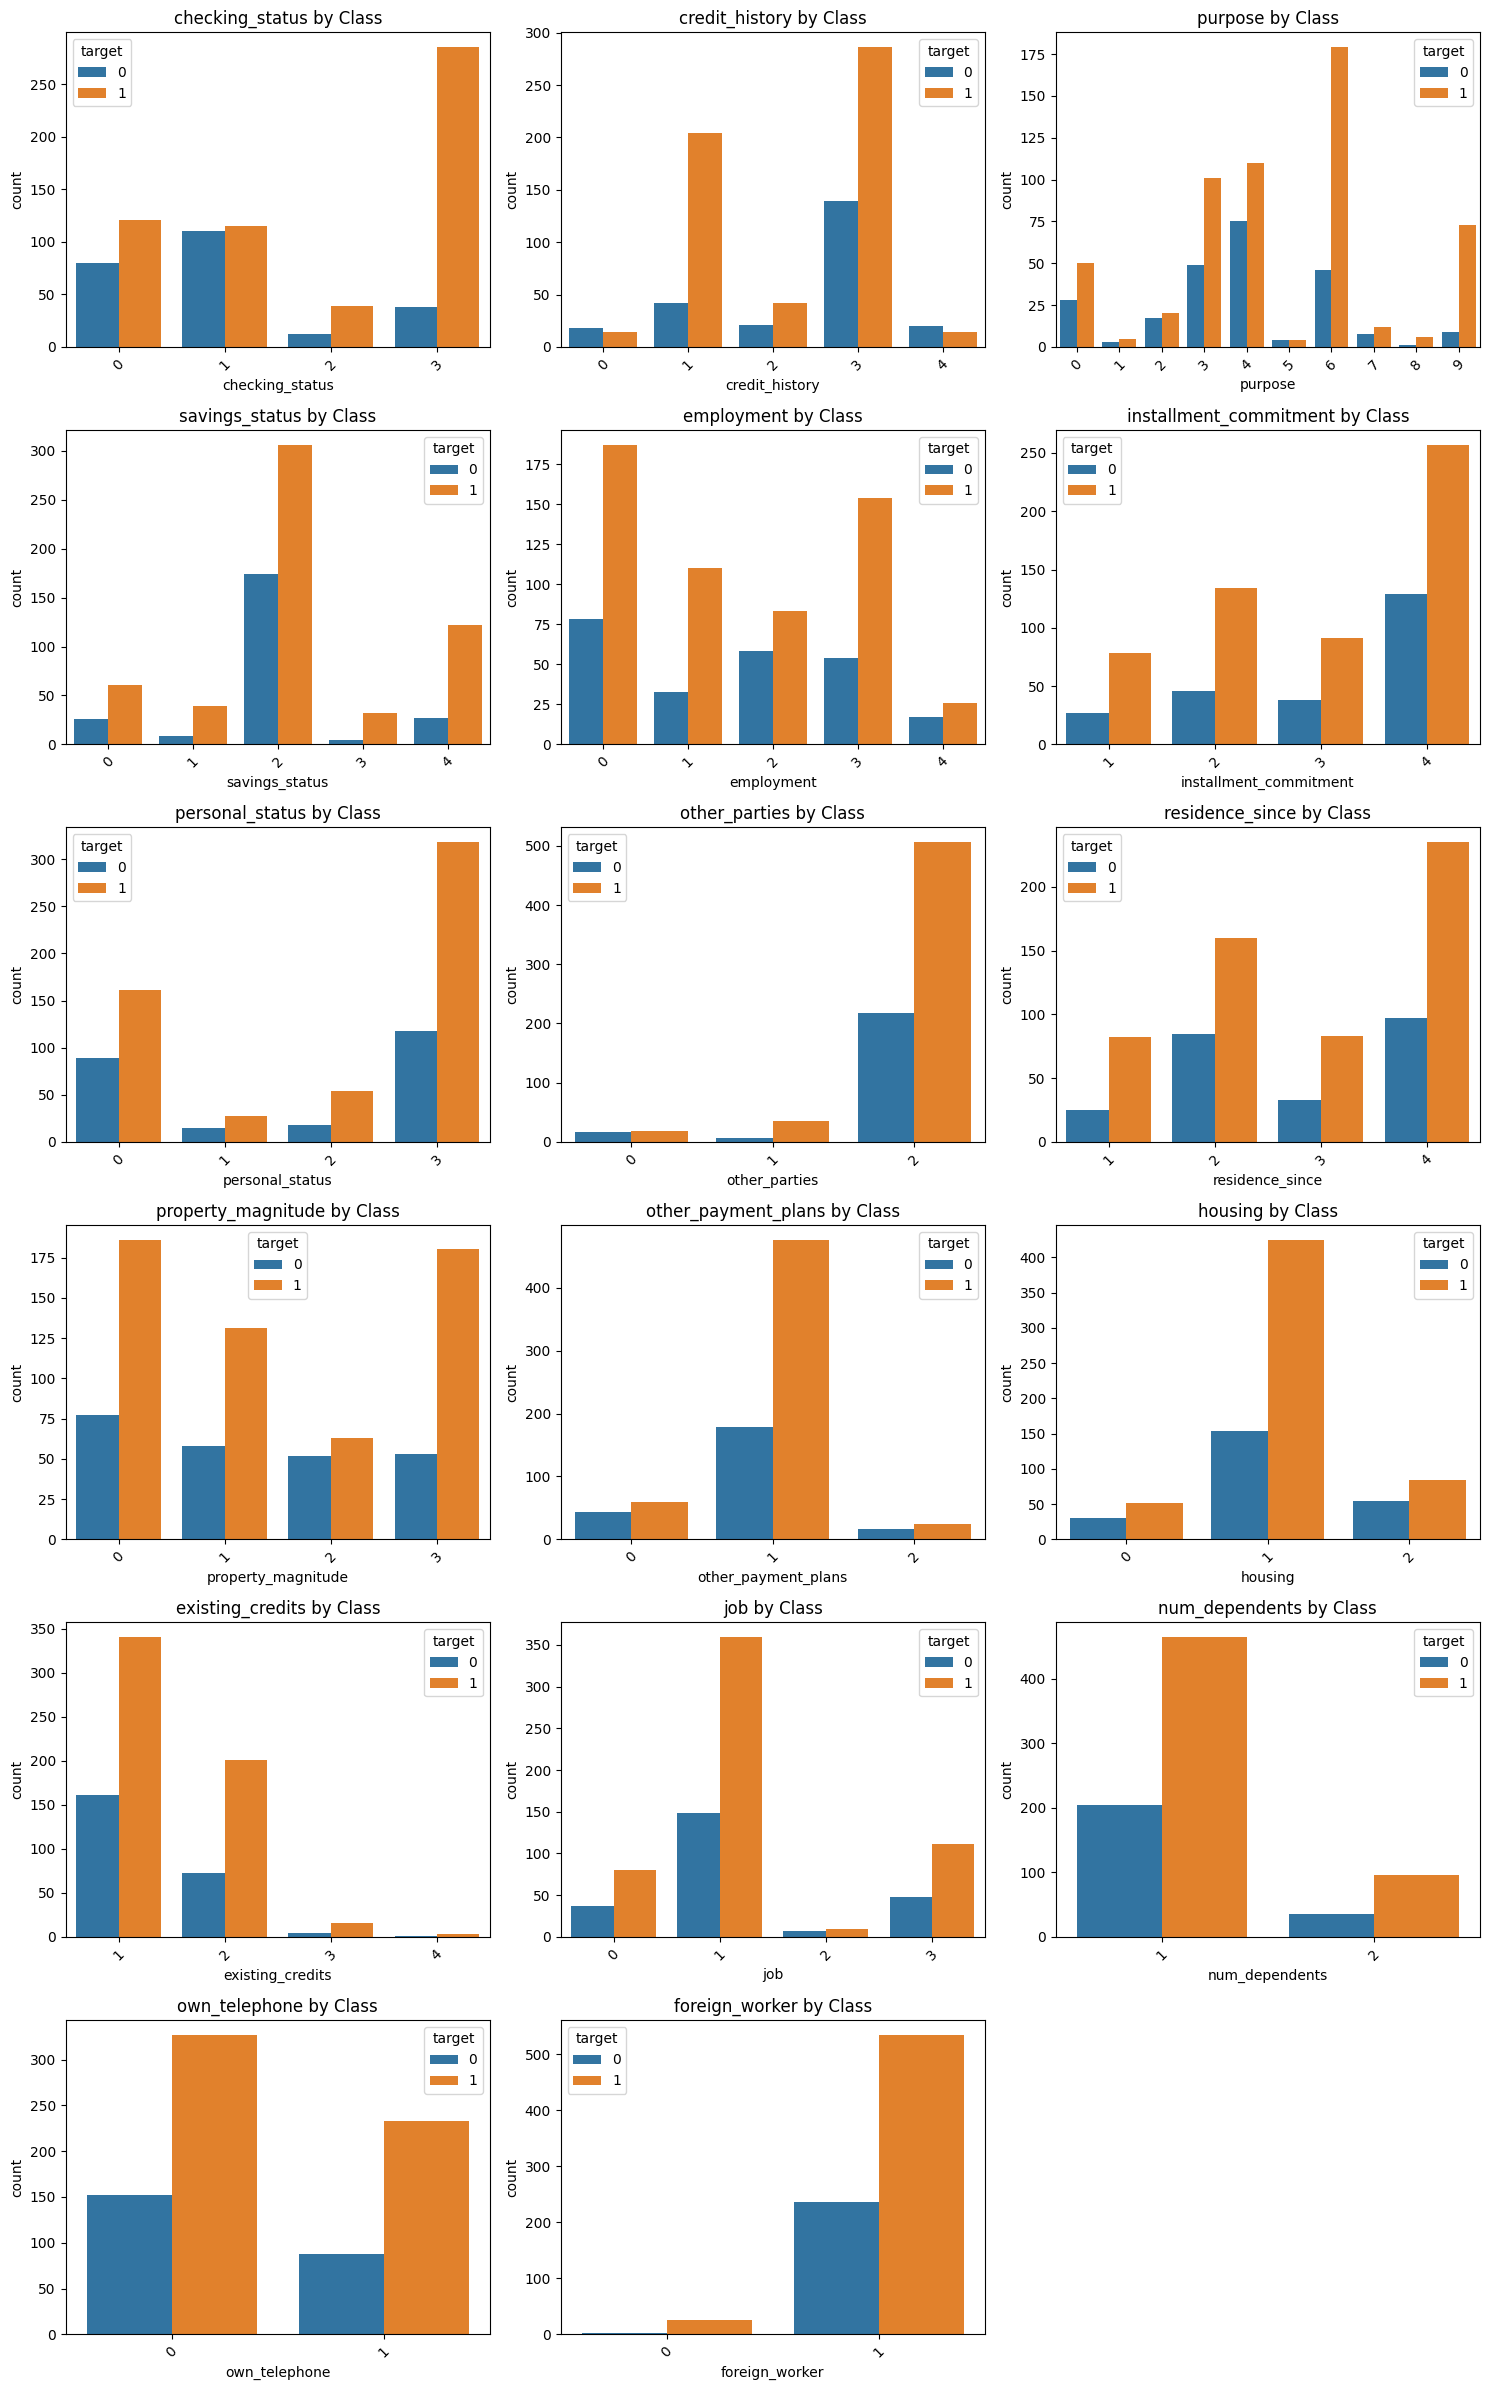

In [10]:
import math

top_cat_cols = [col for col in df.columns if df[col].nunique() <= 10 and col != "target"]
n = len(top_cat_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(top_cat_cols):
    sns.countplot(x=col, hue="target", data=df, ax=axes[i])
    axes[i].set_title(f"{col} by Class")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


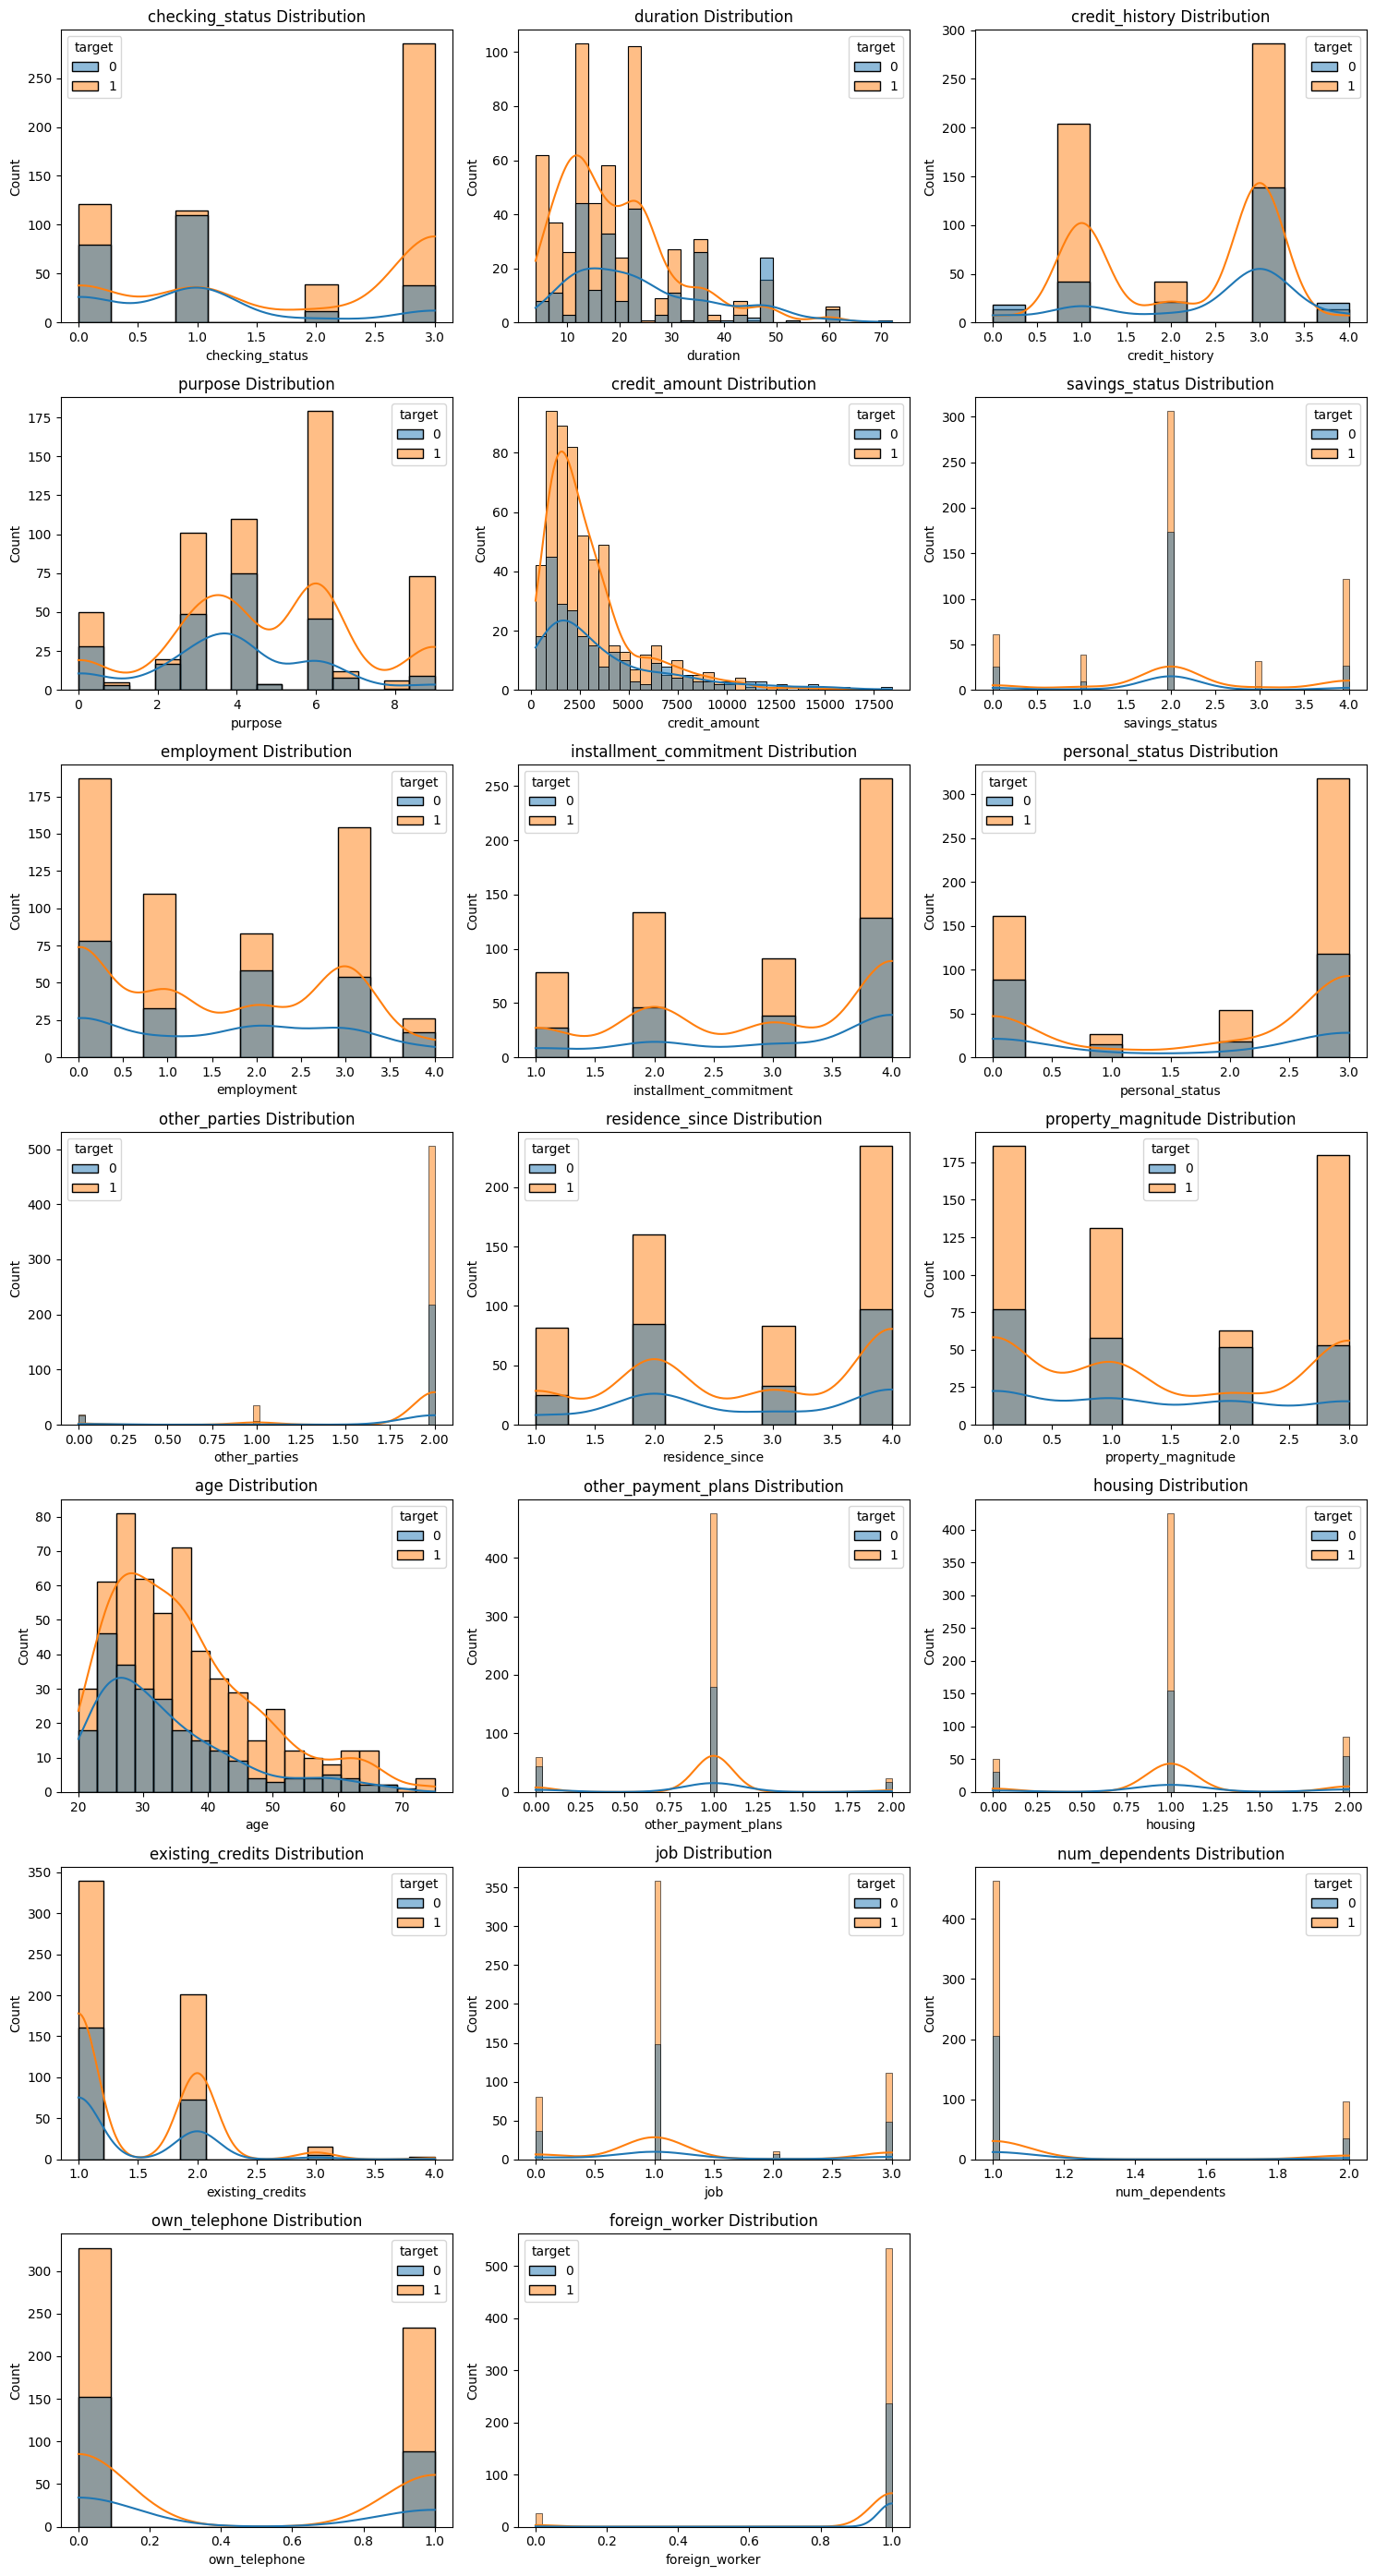

In [11]:
num_cols = [col for col in df.columns if col != "target" and df[col].dtype in ["int64", "float64"]]
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue="target", kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
